In [ ]:
!pip install statsmodels==0.13.5

import statsmodels as sm
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.filters.hp_filter import hpfilter

In [ ]:
!wget https://www2.census.gov/software/x-13arima-seats/x13as/unix-linux/program-archives/x13as_ascii-v1-1-b59.tar.gz


--2023-08-04 19:07:12--  https://www2.census.gov/software/x-13arima-seats/x13as/unix-linux/program-archives/x13as_ascii-v1-1-b59.tar.gz
Resolving www2.census.gov (www2.census.gov)... 104.118.232.133, 2600:1407:1800:38b::208c, 2600:1407:1800:3a2::208c
Connecting to www2.census.gov (www2.census.gov)|104.118.232.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3780035 (3.6M) [application/x-tar]
Saving to: ‘x13as_ascii-v1-1-b59.tar.gz’

x13as_ascii-v1-1-b5 100%[===================>]   3.60M  9.22MB/s    in 0.4s    

2023-08-04 19:07:13 (9.22 MB/s) - ‘x13as_ascii-v1-1-b59.tar.gz’ saved [3780035/3780035]



In [ ]:
!tar --gunzip --extract --file=x13as_ascii-v1-1-b59.tar.gz

In [ ]:
from statsmodels.tsa import x13

In [ ]:
import os
os.environ['X13PATH'] = '/content/x13as'


In [ ]:
df = pd.read_excel('Tax Revenue US.xlsx', sheet_name="MTS_RcptOutlyDfctSur_20180701_2")
df = df.drop(['Current Month Gross Receipts Amount', 'Current Month Gross Outlay Amount', ], axis=1)
df

,Classification Description,Current Month Deficit Surplus Amount
0,October,6321401796695
1,November,13854743781759
2,December,2319235653093
3,January,-4923683879262
4,February,21523938361840
...,...,...
64,February,26243384319423
65,March,37807631647174
66,April,-17618079034912
67,May,24034823965837


In [ ]:
df['Current Month Deficit Surplus Amount']

0      6321401796695
1     13854743781759
2      2319235653093
3     -4923683879262
4     21523938361840
           ...      
64    26243384319423
65    37807631647174
66   -17618079034912
67    24034823965837
68    22776841253805
Name: Current Month Deficit Surplus Amount, Length: 69, dtype: int64

In [ ]:
start_date, end_date = "2017-10-01", "2023-06-01"

month_list = pd.period_range(start=start_date, end=end_date, freq='M')
df2 = df.drop(['Classification Description'], axis=1)
df2 = df2.set_index(month_list)
df2

,Current Month Deficit Surplus Amount
2017-10,6321401796695
2017-11,13854743781759
2017-12,2319235653093
2018-01,-4923683879262
2018-02,21523938361840
...,...
2023-02,26243384319423
2023-03,37807631647174
2023-04,-17618079034912
2023-05,24034823965837


In [ ]:
ajuste = x13.x13_arima_analysis(endog = df2)

ajustado = ajuste.seasadj

len(month_list)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/x13.py:203: X13Warning: WARNING: Automatic transformation selection cannot be done on a
          series with zero or negative values.
  
          found in the estimated spectrum of the regARIMA residuals.
  warn(errors, X13Warning)


69

In [ ]:
datetimeindex = pd.date_range('2017-10-01', periods=69, freq='M')
datetimeindex

DatetimeIndex(['2017-10-31', '2017-11-30', '2017-12-31', '2018-01-31',
               '2018-02-28', '2018-03-31', '2018-04-30', '2018-05-31',
               '2018-06-30', '2018-07-31', '2018-08-31', '2018-09-30',
               '2018-10-31', '2018-11-30', '2018-12-31', '2019-01-31',
               '2019-02-28', '2019-03-31', '2019-04-30', '2019-05-31',
               '2019-06-30', '2019-07-31', '2019-08-31', '2019-09-30',
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31', '2020-08-31', '2020-09-30',
               '2020-10-31', '2020-11-30', '2020-12-31', '2021-01-31',
               '2021-02-28', '2021-03-31', '2021-04-30', '2021-05-31',
               '2021-06-30', '2021-07-31', '2021-08-31', '2021-09-30',
               '2021-10-31', '2021-11-30', '2021-12-31', '2022-01-31',
               '2022-02-28', '2022-03-31', '2022-04-30', '2022-05-31',
      

<ipython-input-11-41cb9f80ce4a>:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


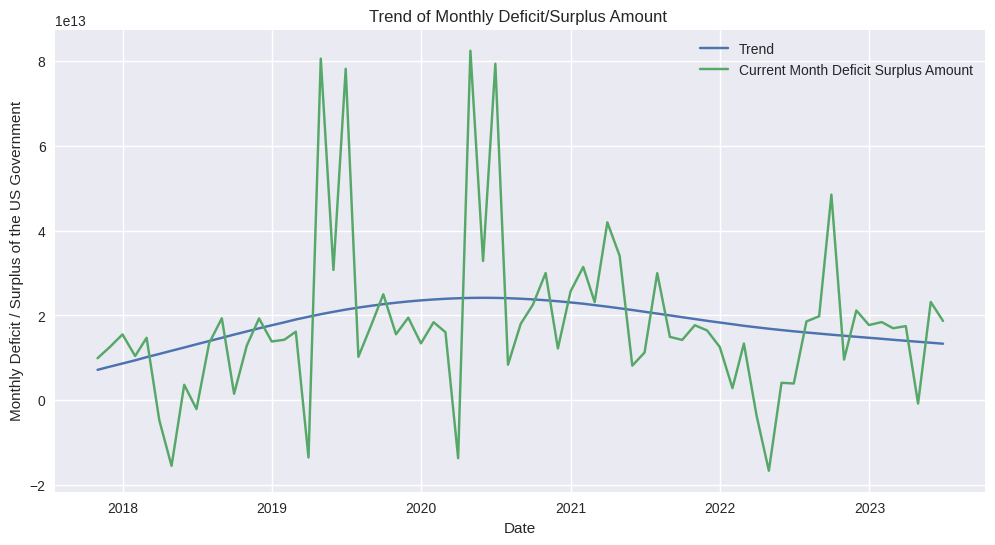

In [ ]:
cycle_defsur, trend_defsur = hpfilter(ajustado, lamb=14400)

cycle_defsur = cycle_defsur.reset_index()
cycle_defsur = cycle_defsur.drop(['index'], axis=1)

trend_defsur = trend_defsur.reset_index()
trend_defsur = trend_defsur.drop(['index'], axis=1)

ajustado2 = ajustado.reset_index()
ajustado2 = ajustado2.drop(['index'], axis=1)



plt.style.use('seaborn')


fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(datetimeindex ,trend_defsur, label='Trend')
ax.plot(datetimeindex, ajustado2, label='Current Month Deficit Surplus Amount')


ax.set_xlabel('Date')
ax.set_ylabel('Monthly Deficit / Surplus of the US Government')
ax.set_title('Trend of Monthly Deficit/Surplus Amount ')
ax.legend(loc='upper right')
plt.show()

NameError: ignored

In [ ]:

dg = pd.read_excel('Tax Revenue US.xlsx', sheet_name="USGovtRevCollect_20180729_2")


dg2 = dg.set_index(dg['Dates'])
dg2 = dg2.drop(['Dates'],axis =1)
dg2 = dg2.drop(['Net Collections Amount'],axis =1)


dg2 = dg2.resample('MS').sum()

dates2 =  dg2.index
dg2

In [ ]:
ajuste3 = x13.x13_arima_analysis(endog = dg2)

ajustado3 = ajuste3.seasadj


<ipython-input-18-d27a27543554>:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


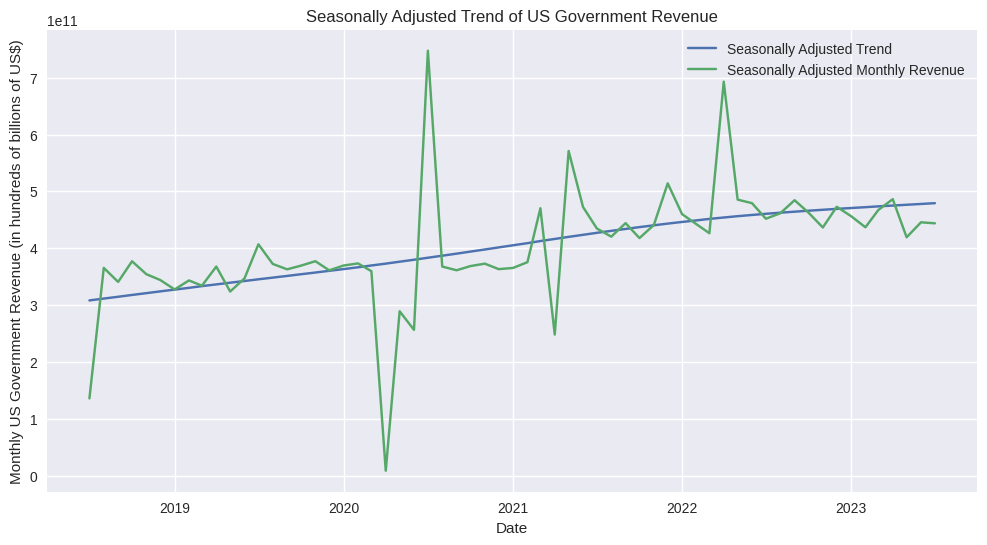

In [ ]:
cycle_rev, trend_rev2 = hpfilter(ajustado3, lamb=14400)

cycle_rev = cycle_rev.reset_index()
cycle_rev = cycle_rev.drop(['Dates'], axis=1)

trend_rev2 = trend_rev2.reset_index()
trend_rev2 = trend_rev2.drop(['Dates'], axis=1)

ajustado4 = ajustado3.reset_index()
ajustado4 = ajustado4.drop(['Dates'], axis=1)



plt.style.use('seaborn')


fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(dates2 ,trend_rev2, label='Seasonally Adjusted Trend')
ax.plot(dates2, ajustado4, label='Seasonally Adjusted Monthly Revenue')


ax.set_xlabel('Date')
ax.set_ylabel('Monthly US Government Revenue (in hundreds of billions of US$)')
ax.set_title('Seasonally Adjusted Trend of US Government Revenue')
ax.legend(loc='upper right')
plt.show()

In [ ]:
dg2
